# Part A - 30 Marks
## DOMAIN: Digital content and entertainment industry

## CONTEXT: 
####                        The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

## DATA DESCRIPTION: 
####                                              The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, 0 does not stand for a specific word, but instead is used to encode any unknown word.

## PROJECT OBJECTIVE: 
### To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

#### 1. Import and analyse the data set. [5 Marks]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
import numpy as np
import json
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, TextVectorization, LSTM, Bidirectional, Embedding
import gc
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 10_000,
                                                                     #maxlen = 20
                                                                    )

#### 2. Perform relevant sequence adding on the data. [5 Marks]

In [3]:
x_train_padded = []
x_test_padded = []

for train_sample, test_sample in zip(x_train, x_test):
    if len(train_sample) < 20:
        x_train_padded.append(
            train_sample + ( ["0"] * (20 - len(train_sample) ) )
        )
    else:
        x_train_padded.append(
            train_sample[ : 20 ]
        )
    if len(test_sample) < 20:
        x_test_padded.append(
            test_sample + ( ["0"] * (20 - len(test_sample) ) )
        )
    else:
        x_test_padded.append(
            test_sample[ : 20 ]
        )

In [4]:
x_train_padded = np.asarray(x_train_padded, dtype = np.int32)
x_test_padded = np.asarray(x_test_padded, dtype = np.int32)

#### 3. Perform following data analysis: [5 Marks]

#### •Print shape of features and labels

#### •Print value of any one feature and it's label

In [5]:
x_train_padded.shape, x_test_padded.shape, y_train.shape, y_test.shape


((25000, 20), (25000, 20), (25000,), (25000,))

In [6]:
print(f"{x_train_padded[0]} \n\n {y_train[0]}")


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25] 

 1


4. Decode the feature value to get original sentence [5 Marks]

In [7]:
vocab = keras.datasets.imdb.get_word_index()
vocab["0"] = 0

In [8]:
index_to_word = { index : word for word, index in vocab.items() }


In [9]:
reviews = []

for sample in x_train_padded[ : 20 ] :
    reviews.append(" ".join([index_to_word.get(index - 3, "0") for index in sample]))

In [10]:
for review, sentiment in zip(reviews, y_train[ : 20 ] ) :
    print(f"{review :150}  {sentiment} " )

0 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you                           1 
0 big hair big boobs bad music and a giant safety pin these are the words to best describe this                                                         0 
0 this has to be one of the worst films of the 1990s when my friends i were watching this                                                               0 
0 the 0 0 at storytelling the traditional sort many years after the event i can still see in my                                                         1 
0 worst mistake of my life br br i picked this movie up at target for 5 because i figured                                                               0 
0 begins better than it ends funny that the russian submarine crew 0 all other actors it's like those scenes                                            0 
0 lavish production values and solid performances in this straightforw

#### 5. Design, train, tune and test a sequential model. [5 Marks]

In [11]:
def vectorize_data(data, vocab_size = 10_000):
    vectorized_data = np.zeros(shape = (len(data), vocab_size,))
    for index, sample in enumerate(data):
        for word_index in sample:
            #print(index, word_index)
            if word_index != "?":
                vectorized_data[int(index), int(word_index)] = 1
    return vectorized_data

In [12]:
x_train_padded = vectorize_data(x_train_padded)
x_test_padded = vectorize_data(x_test_padded)

In [13]:
x_train_padded.shape, x_test_padded.shape

((25000, 10000), (25000, 10000))

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape = 10_000))
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                        

In [15]:
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
history = model.fit(
    x = x_train_padded,
    y = y_train,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.1,
    callbacks = [ keras.callbacks.ReduceLROnPlateau(patience = 3), keras.callbacks.ModelCheckpoint(filepath = "./best.keras")]
)

Epoch 1/20
176/176 [==============================] - 4s 17ms/step - loss: 0.6903 - accuracy: 0.5765 - val_loss: 0.6815 - val_accuracy: 0.4924 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 0.5308 - accuracy: 0.7343 - val_loss: 0.6373 - val_accuracy: 0.6228 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 0.4366 - accuracy: 0.7985 - val_loss: 0.5719 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 4/20
176/176 [==============================] - 1s 7ms/step - loss: 0.3589 - accuracy: 0.8467 - val_loss: 0.6007 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 5/20
176/176 [==============================] - 1s 6ms/step - loss: 0.2917 - accuracy: 0.8800 - val_loss: 0.6615 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 6/20
176/176 [==============================] - 1s 6ms/step - loss: 0.2380 - accuracy: 0.9062 - val_loss: 0.7577 - val_accuracy: 0.6876 - lr: 0.0010
Epoch 7/20
176/176 [==============================] - 1s 6ms/step - l

In [17]:
model.evaluate(x_test_padded, y_test)


782/782 [==============================] - 1s 2ms/step - loss: 0.8789 - accuracy: 0.6635


[0.8789253830909729, 0.6634799838066101]

In [18]:
del model
import gc 
gc.collect()

2106

i think i gona explore more

In [19]:
model = keras.Sequential()
model.add(keras.Input(shape = 10_000))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(64, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560256   
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [20]:
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [21]:
history = model.fit(
    x = x_train_padded,
    y = y_train,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.1,
    callbacks = [ keras.callbacks.ReduceLROnPlateau(patience = 3), keras.callbacks.ModelCheckpoint(filepath = "./best.keras")]
)

Epoch 1/20
176/176 [==============================] - 7s 33ms/step - loss: 0.6192 - accuracy: 0.6531 - val_loss: 0.5556 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 6s 32ms/step - loss: 0.4915 - accuracy: 0.7733 - val_loss: 0.5430 - val_accuracy: 0.7196 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 6s 32ms/step - loss: 0.3863 - accuracy: 0.8429 - val_loss: 0.5903 - val_accuracy: 0.7224 - lr: 0.0010
Epoch 4/20
176/176 [==============================] - 6s 32ms/step - loss: 0.2502 - accuracy: 0.9120 - val_loss: 0.7470 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 5/20
176/176 [==============================] - 6s 32ms/step - loss: 0.1331 - accuracy: 0.9593 - val_loss: 1.0166 - val_accuracy: 0.7028 - lr: 0.0010
Epoch 6/20
176/176 [==============================] - 6s 33ms/step - loss: 0.0463 - accuracy: 0.9911 - val_loss: 1.4147 - val_accuracy: 0.7072 - lr: 1.0000e-04
Epoch 7/20
176/176 [==============================] - 6s 32m

In [22]:
model.evaluate(x_test_padded, y_test)


782/782 [==============================] - 3s 4ms/step - loss: 2.0511 - accuracy: 0.6858


[2.0511038303375244, 0.6857600212097168]

I think i have to increase sequence length bcz things would've been better had we used the entire reviews rather than only the first 20 words of them

#### 6. Use the designed model to print the prediction on any one sample. [5 Marks]


In [23]:
pred = model.predict(x_train_padded[np.newaxis, 6])
print(" ".join(index_to_word[index] for index in x_train[0]), f"\npredicted : {pred.item()} \t real : {y_test[6]}")

1/1 [==============================] - 0s 261ms/step
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart

# Part B - 30 Marks

## DOMAIN: Social media analytics

## CONTEXT: 
####                       Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

## DATA DESCRIPTION:

#### The dataset is collected from two news websites, theonion.com and huffingtonpost.com.

#### This new dataset has the following advantages over the existing Twitter datasets:

#### Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of inding pre-trained embeddings.

#### Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

#### Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

####  Content: Each record consists of three attributes:

#### is_sarcastic: 1 if the record is sarcastic otherwise 0
#### headline: the headline of the news article
#### article_link: link to the original news article. Useful in collecting supplementary data
#### Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

## PROJECT OBJECTIVE: 
### Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

#### 1. Read and explore the data [3 Marks]

In [24]:
dataset = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)


In [25]:
dataset


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [26]:
dataset.describe(include= "all")

,is_sarcastic,headline,article_link
count,28619.000000,28619,28619
unique,NaN,28503,28617
top,NaN,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,NaN,12,2
mean,0.476397,NaN,NaN
std,0.499451,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [27]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [28]:
dataset["is_sarcastic"].value_counts()


0    14985
1    13634
Name: is_sarcastic, dtype: int64

No class is under-represented in this datase

<AxesSubplot:ylabel='Count'>

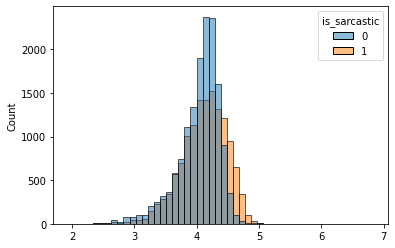

In [29]:
sns.histplot(x = [np.log(len(text)) for text in dataset["headline"]], hue = dataset["is_sarcastic"], bins = 50)


2. Retain relevant columns [3 Marks]


In [30]:
dataset.drop("article_link", axis = 1, inplace = True)


In [31]:
dataset.columns


Index(['is_sarcastic', 'headline'], dtype='object')

#### 3. Get length of each sentence [3 Marks]


In [32]:
lengths = []
for text in dataset["headline"]:
    lengths.append(len(text))

#### 4. Define parameters [3 Marks]


In [33]:
print(f"""
{"Number of words I'll be taking " :50} :50
{"Maximum possible length of each sentence" :50} :{max(lengths)}
{"Embedding Vector I'll be using" :50} :GloVe's Twitter 27 Billion tokens and 25 dimensional words
""")


Number of words I'll be taking                     :50
Maximum possible length of each sentence           :926
Embedding Vector I'll be using                     :GloVe's Twitter 27 Billion tokens and 25 dimensional words



#### 5. Get indices for words [3 Marks]


In [34]:
indicer = TextVectorization(
    output_mode = "int",
    #max_tokens = 2000,
    output_sequence_length = 50
)

indicer.adapt(dataset["headline"])

#### 6. Create features and labels [3 Marks]


In [35]:
vectorized_data = np.ndarray(shape = (28_619, 50))


In [36]:
for index, headline in enumerate(dataset["headline"]): #limiting the dataset due to time constraints
    #print(headline)
    tensor = (indicer(headline))
    if tensor.shape == (0,):
        tensor = np.zeros((50,))
    vectorized_data[index] = tensor


In [37]:
np.save("./data.npz", vectorized_data)


In [38]:
targets = np.array(dataset["is_sarcastic"])


In [39]:
targets

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

#### 7. Get vocabulary size [3 marks]


In [40]:
indicer.vocabulary_size()


29674

#### 8. Create a weight matrix using GloVe embeddings [3 marks]


In [46]:
embeddings_dict = {}
with open("glove.twitter.27B.25d.txt" and "glove.twitter.27B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float16")
        embeddings_dict[word] = vector

Assigning indices according to our vocabulary, not the GloVe vocabulary



In [ ]:
indice_embeddings = np.zeros((29683, 25))
for index, word in enumerate(indicer.get_vocabulary()):
    #print(word)
    indice_embeddings[index] = embeddings_dict.get(word, np.zeros((25)) )

#### 9. Define and compile a Bidirectional LSTM model. [3 Marks]


In [52]:
inputs = keras.Input(shape = (50))

embeddings = Embedding(29683,
                       25,
                       embeddings_initializer = keras.initializers.Constant(indice_embeddings),
                       trainable = False
                       )(inputs)
features = Bidirectional(LSTM(8, unroll = True, return_sequences = True), )(embeddings)
features = Dropout(0.3)(features)
features = Bidirectional(LSTM(16, unroll = True),)(features)
features = Dropout(0.3)(features)
outputs = Dense(1, activation = "sigmoid")(features)

MODEL = keras.Model(inputs, outputs)
MODEL.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 25)            742075    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 16)           2176      
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 50, 16)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32)                0     

In [53]:
MODEL.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

#### 10. Fit the model and check the validation accuracy [3 Marks]


In [54]:
history = MODEL.fit(vectorized_data[ : 25_000], 
                    targets[ : 25_000],
                    epochs = 100,
                    batch_size = 512,
                    validation_split = 0.1,
                    callbacks = [ keras.callbacks.ModelCheckpoint(filepath="./best_part2.keras"),
                                 keras.callbacks.ReduceLROnPlateau(patience = 10)
                                ]
                   )

Epoch 1/100
44/44 [==============================] - 30s 144ms/step - loss: 0.6923 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 3s 70ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6919 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 3s 70ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 3s 70ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6919 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 3s 78ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 3s 70ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 3s 70ms/step - 

In [55]:
MODEL.evaluate(vectorized_data[ 25_000 : ], targets[ 25_000 : ] )


114/114 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.5239


[0.6920068264007568, 0.523901641368866]

In [56]:
del MODEL
gc.collect()

2096

In [57]:
inputs = keras.Input(shape = (50))

embeddings = Embedding(29683,
                       25,
                       embeddings_initializer = keras.initializers.Constant(indice_embeddings),
                       trainable = False
                       )(inputs)
features = Bidirectional(LSTM(64, unroll = True, return_sequences = True), )(embeddings)
features = Dropout(0.3)(features)
features = Bidirectional(LSTM(32, unroll = True, return_sequences = True),)(features)
features = Dropout(0.3)(features)
features = Bidirectional(LSTM(16, unroll = True, return_sequences = True), )(embeddings)
features = Dropout(0.3)(features)
features = Bidirectional(LSTM(8, unroll = True, ), )(embeddings)
features = Dropout(0.3)(features)
outputs = Dense(1, activation = "sigmoid")(features)

MODEL2 = keras.Model(inputs, outputs)
MODEL2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 25)            742075    
                                                                 
 bidirectional_5 (Bidirectio  (None, 16)               2176      
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 744,268
Trainable params: 2,193
Non-trainable params: 742,075
_________________________________________________

In [58]:
MODEL2.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [59]:
history = MODEL2.fit(vectorized_data[ : 25_000], 
                    targets[ : 25_000],
                    epochs = 100,
                    batch_size = 512,
                    validation_split = 0.1,
                    callbacks = [ keras.callbacks.ModelCheckpoint(filepath="./best_part2.keras"),
                                 keras.callbacks.ReduceLROnPlateau(patience = 10)
                                ]
                   )

Epoch 1/100
44/44 [==============================] - 15s 69ms/step - loss: 0.6923 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 1s 33ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 1s 33ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 1s 33ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6919 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 1s 32ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6919 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 1s 33ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 1s 33ms/step - l

In [60]:
MODEL2.evaluate(vectorized_data[ 25_000 : ], targets[ 25_000 : ])

114/114 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.5239


[0.69200599193573, 0.523901641368866]

In [61]:
!jupyter nbconvert project_2.ipynb --to html


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'project_2.ipynb' matched no files
